In [27]:
import pandas as pd
import datetime as dt

In [44]:
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
products

,ProductID,ProductName,QuantityPerUnit,UnitCost,UnitPrice,CategoryName
0,1,Банан,10,15.37,20.00,Фрукты
1,2,Апельсин,10,16.17,19.00,Фрукты
2,5,Яблоко,100,4.72,6.00,Фрукты
3,11,Киви,25,21.10,28.00,Фрукты
4,24,Абрикос,100,3.90,4.50,Фрукты
...,...,...,...,...,...,...
72,42,Утка,1,10.95,14.00,Мясо/Птица
73,52,Говядина,14,70.81,80.00,Мясо/Птица
74,56,Свинина,15,34.17,38.00,Мясо/Птица
75,57,Фарш свиной,20,16.14,19.50,Мясо/Птица


In [18]:
# Определите число уникальных продуктов в каждой категории.
products = pd.read_csv('products.csv')
products['count_products'] = products.groupby(['CategoryName'],
                                              as_index=False)['ProductName'].transform(
    lambda product_names: len(set(product_names)))
products.drop_duplicates(subset=['CategoryName', 'count_products'])[
    ['CategoryName', 'count_products']]

,CategoryName,count_products
0,Фрукты,9
9,Овощи,16
25,Крупы,4
29,Морепродукты,7
36,Приправы,11
47,Молочные продукты,6
53,Кондитерские изделия,17
70,Мясо/Птица,7


In [23]:
# Выведите все продукты в категории "Морепродукты"
products = pd.read_csv('products.csv')
products[products.CategoryName == 'Морепродукты']['ProductName']

29               Омары
30            Кальмары
31            Креветки
32    Крабовые палочки
33          Мидии мини
34       Креветки мини
35               Мидии
Name: ProductName, dtype: object

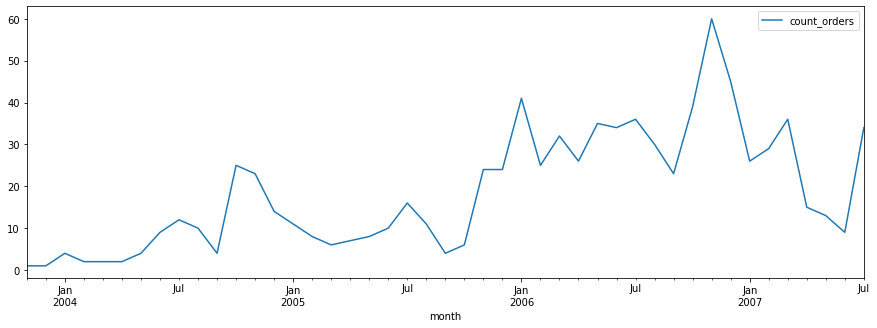

In [43]:
# Выведите график числа заказов за каждый прошедший месяц.
def get_month(date):
    return date.replace(day=1)
orders = pd.read_csv('orders.csv')

orders['month'] = pd.to_datetime(orders['OrderDate'], format='%Y-%m-%d').apply(get_month)

orders['count_orders'] = orders.groupby(['month'], as_index=False)['OrderID'].transform(
    lambda order_ids: len(set(order_ids)))
orders.drop_duplicates(subset=['month', 'count_orders'])[
    ['month', 'count_orders']].sort_values('month').set_index('month').plot(figsize=(15,5));

In [69]:
# Заведите столбец "OrderSum" 
# (сколько было оплачено за продукт по заказу, с учётом его количества, 
#  стоимости единицы товара и скидки). 
# Определите самые дорогие заказы (сгруппировав по OrderID)
orders = pd.read_csv('orders.csv')
orders['OrderSum'] = orders['UnitPrice'] * (1 - orders['Discount']) * orders['Quantity']

orders.groupby(['OrderID'], as_index=False)[
    'OrderSum'].sum().round(2).sort_values('OrderSum', ascending=False)

,OrderID,OrderSum
364,10612,33479.95
743,10991,30370.72
713,10961,23757.37
714,10962,21397.63
282,10530,21352.45
...,...,...
559,10807,20.11
283,10531,15.80
633,10881,11.90
534,10782,8.19


In [73]:
# Определите продукты с максимальной стоимостью за шт. (не за единицу товара)
orders = pd.read_csv('orders.csv')
orders['product_cost'] = orders['UnitPrice'] * (1 - orders['Discount'])
orders.sort_values('product_cost', ascending=False)[['OrderDate', 'ProductID', 'product_cost']]

,OrderDate,ProductID,product_cost
310,2006-09-22,76,432.530
1655,2006-09-06,76,430.530
1197,2006-07-09,76,428.690
1321,2006-06-16,76,419.230
441,2005-07-11,76,414.960
...,...,...,...
1170,2006-05-02,73,1.003
835,2005-05-01,73,0.990
462,2006-08-17,73,0.972
757,2005-03-09,73,0.969


## задание 2

In [79]:
#Для каждой категории продуктов выведите средний доход от продаж. (OrderSum)
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

orders = orders.merge(products[['ProductID', 'CategoryName']])
orders['position_cost'] = orders['UnitPrice'] * (1 - orders['Discount']) * orders['Quantity']
orders.groupby('CategoryName', as_index=False)['position_cost'].mean().rename(
    columns={'position_cost': 'position_mean'})

,CategoryName,position_mean
0,Кондитерские изделия,449.824658
1,Крупы,801.447795
2,Молочные продукты,228.715377
3,Морепродукты,1365.196193
4,Мясо/Птица,672.060841
5,Овощи,1720.202115
6,Приправы,370.851352
7,Фрукты,359.254480


In [88]:
# Введите столбец "Profit" - разность между доходами 
# и приблизительной закупочной стоимостью проданных товаров.
products = pd.read_csv('products.csv')
orders = pd.read_csv('orders.csv')
orders = orders.merge(products[['ProductID', 'UnitCost']])

orders['position_price'] = orders['UnitPrice'] * (1 - orders['Discount']) * orders['Quantity']
orders['profit'] = (orders['position_price']) - orders['UnitCost'] * orders['Quantity']
orders

,OrderID,OrderDate,ProductID,UnitPrice,Quantity,Discount,UnitCost,position_price,profit
0,10248,2007-01-30,11,28.62,12,0.00,21.1,343.440000,90.240000
1,10296,2004-02-02,11,26.62,12,0.00,21.1,319.440000,66.240000
2,10327,2004-07-08,11,29.10,50,0.20,21.1,1163.999996,108.999996
3,10353,2007-06-11,11,29.75,12,0.20,21.1,285.599999,32.399999
4,10365,2004-06-24,11,29.48,24,0.00,21.1,707.520000,201.120000
...,...,...,...,...,...,...,...,...,...
2167,10515,2004-12-18,9,42.05,16,0.15,32.9,571.879996,45.479996
2168,10687,2006-04-26,9,41.17,50,0.25,32.9,1543.875000,-101.125000
2169,10693,2006-05-02,9,35.30,6,0.00,32.9,211.800000,14.400000
2170,10848,2007-06-21,9,40.32,3,0.00,32.9,120.960000,22.260000


In [123]:
# Найдите по убыванию суммарной прибыли категории товаров,
# обеспечивающие  её 80 процентов. 
# Выведите аналогичные данные только за 2005 и 2006 год

products = pd.read_csv('products.csv')
orders = pd.read_csv('orders.csv')
orders.OrderDate = pd.to_datetime(orders.OrderDate, format='%Y-%m-%d')

input_ = {'Total': {'min': orders.OrderDate.min(), 'max': orders.OrderDate.max()},
          '2005-2006': {'min': dt.datetime(2005,1,1), 'max': dt.datetime(2006,12,31)}
         }

for period, daterange in input_.items():
    
    period_orders = orders.copy()[(orders.OrderDate >= daterange['min']) 
                                  & (orders.OrderDate <= daterange['max'])]

    period_orders = period_orders.merge(
        products[['ProductID', 'UnitCost', 'CategoryName', 'ProductName']])

    period_orders['position_price'] = period_orders['UnitPrice'] * (1 - period_orders['Discount']) * period_orders['Quantity']
    period_orders['position_cost'] = period_orders['UnitCost'] * period_orders['Quantity']
    period_orders['profit'] = period_orders['position_price'] - period_orders['position_cost']

    period_orders = period_orders.groupby('CategoryName',
                            as_index=False)['profit'].sum().sort_values('profit', ascending=False)

    total_profit = period_orders['profit'].sum()
    profit_by_categories = 0
    profit_categories = []

    for row in period_orders.itertuples():
        profit_by_categories += row.profit
        profit_categories.append(row.CategoryName)

        if profit_by_categories >= total_profit * 0.8:
            break

    print(period, profit_categories)

Total ['Овощи', 'Кондитерские изделия', 'Морепродукты', 'Мясо/Птица']
2005-2006 ['Овощи', 'Кондитерские изделия', 'Морепродукты', 'Приправы']
